In [42]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import preprocessing

In [43]:
def lamda(MTTF):
    return 1/MTTF

def distributionRel(x):
    return np.exp(x)

def serialSubsysRel(R1, R2):
    R = R1 * R2
    return R

def parallelSubsysRel(R1, R2):
    Q1 = 1 - R1
    Q2 = 1 - R2
    Q = Q1 * Q2
    R = 1 - Q
    return R

def totalRgraph(Rel):
    R2_3 = parallelSubsysRel(Rel[1], Rel[2])
    R4_5 = serialSubsysRel(Rel[3], Rel[4])
    R4_5_6 = parallelSubsysRel(R4_5, Rel[5])

    R_total = serialSubsysRel(serialSubsysRel(serialSubsysRel(Rel[0],R2_3), R4_5_6), Rel[6])
    return R_total
def computeRelDistributions(Ci, i, T_c):
    lamda_i = lamda(Ci[0])
    points = 1000
    t = np.linspace(0, T_c, points)
    rel = - lamda_i*t
    rel = distributionRel(rel)
    # duty cycle
    d = Ci[1]
    rel = np.power(rel,d)
    
#     plt.title('Component '+ str(i + 1) +' with duty cycle '+ str(d)+', lamda = '+str(lamda_i))
#     #plt.title("Component %d with duty cycle %1.1f" %i %d)
#     plt.ylabel("Reliability")
#     plt.xlabel("Time interval $T_c$")
#     plt.plot(t,rel)
#     plt.show()
    return rel, lamda_i

### 1. Προσομοίωση σύνθετου συστήματος 

In [55]:
# ask 1 erwthma 1 , Setup&Dataset
# array : Ci , MTTF, Duty Cycle, MTTR
C1 = np.array([30, 0.3, 12])
C2 = np.array([27, 1, 12])
C3 = np.array([27, 1, 12])
C4 = np.array([24, 1, 10])
C5 = np.array([25, 1, 10])
C6 = np.array([15, 1, 8])
C7 = np.array([31, 0.4, 12])
# print(C1)
# data_C = np.ndarray(7, 3)
# print(data_C)
T_c = 100 #xronos meleths components
T_s = 30 #xronos meleths systhmatos
N = 1000 #epanalhpseis
C = np.vstack((C1,C2,C3,C4,C5,C6,C7))
Rel = np.zeros((C.shape[0],1000))
lamdas = np.zeros((C.shape[0],))

for i in range(C.shape[0]):
    Rel[i, :], lamdas[i] = computeRelDistributions(C[i], i, T_c) 

one = mpatches.Patch(facecolor='#0343DF', label='Theoritical', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#0343DF', label = 'Experimental', linewidth = 0.5, edgecolor = 'black')

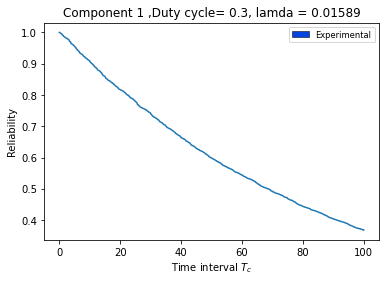

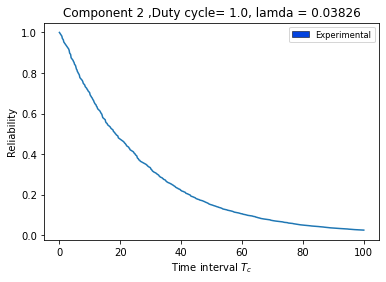

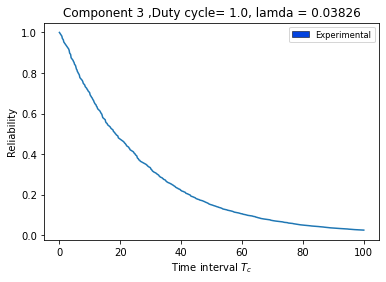

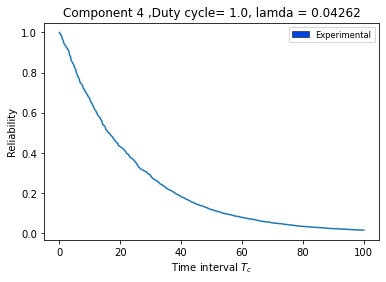

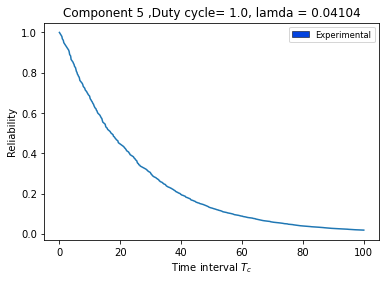

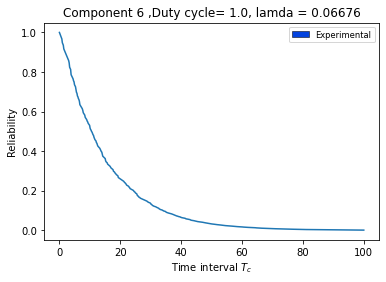

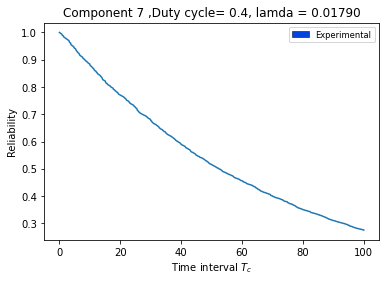

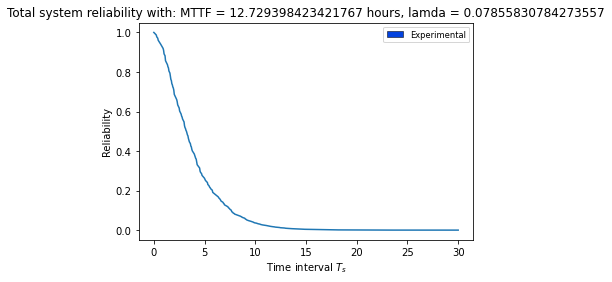

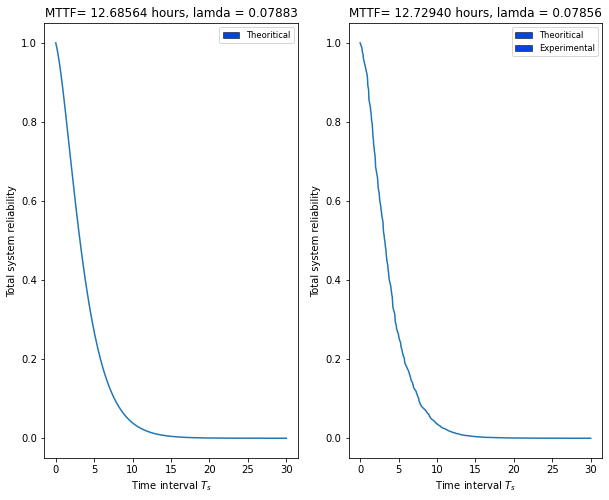

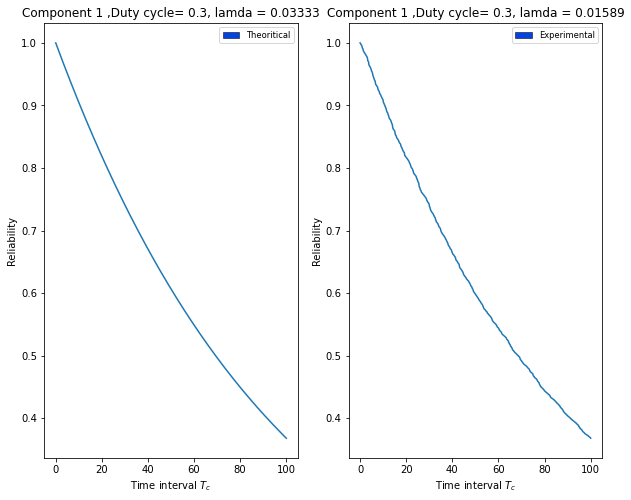

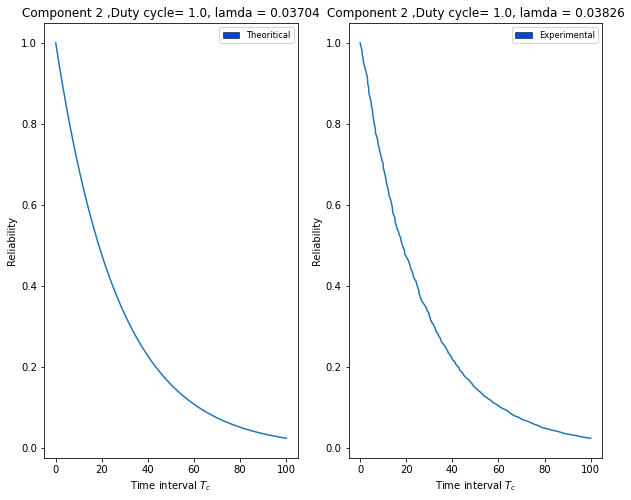

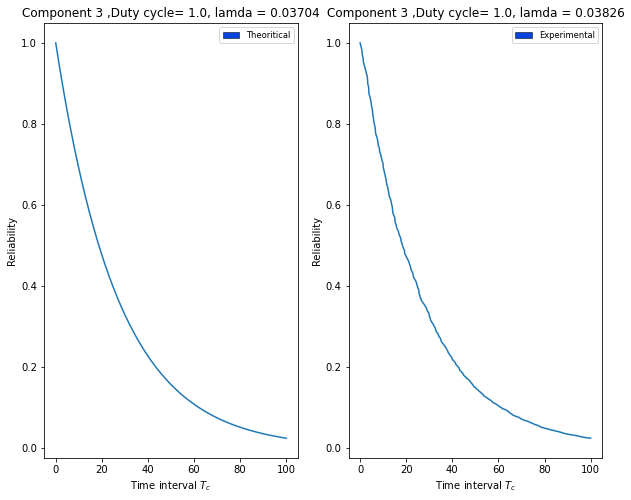

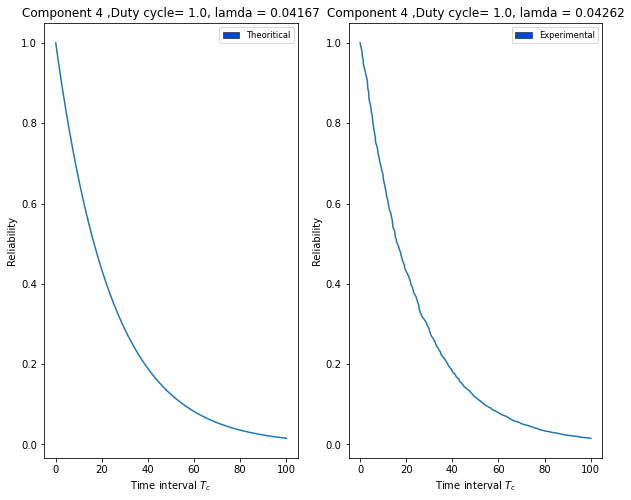

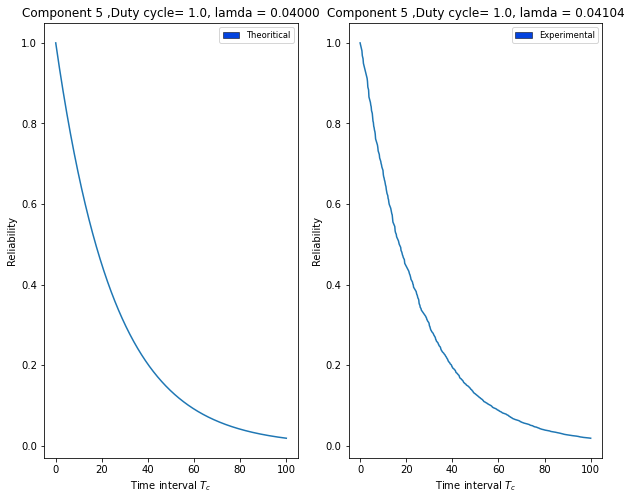

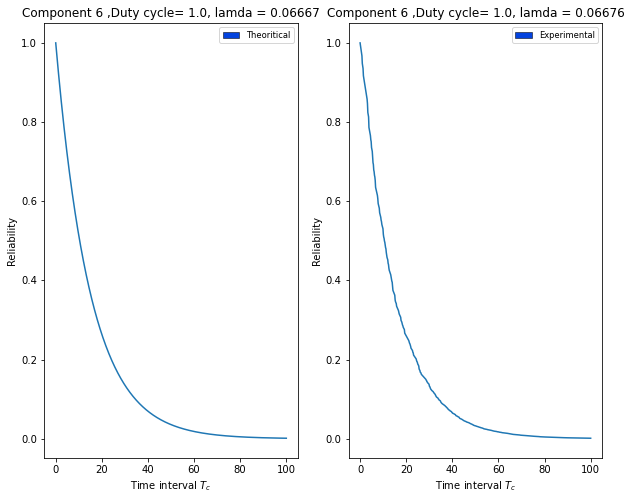

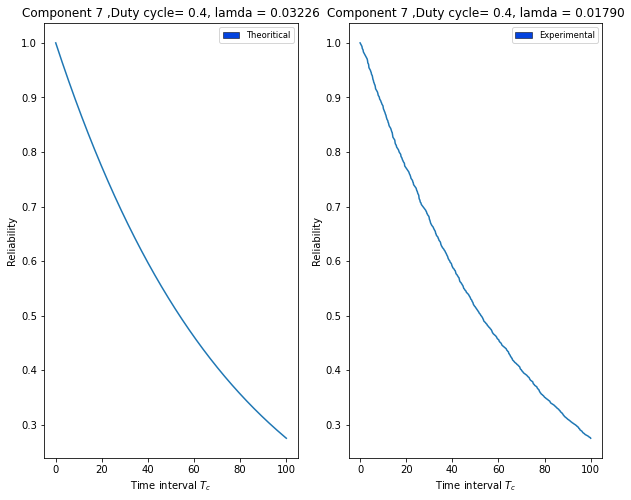

In [56]:

# PEIRAMATA

# ask 1 erwthma 2
randPickerIdx = np.ndarray((N,1))
randPickerIdx = np.random.rand(N,1)
randPickerIdx = np.floor(N*randPickerIdx)
randPickerIdx = (np.unique(randPickerIdx)).astype(int)

expirementalRel = np.ndarray((C.shape[0], randPickerIdx.shape[0]))
expLamda = np.ndarray((C.shape[0], 1))
tc_exp = np.linspace(0, T_c, randPickerIdx.shape[0])

# t = np.linspace(0, T_c, N)
# expirementalRel = np.ndarray(Rel.shape)
integral_space_i = np.linspace(0, T_c, randPickerIdx.shape[0])

for i in range(C.shape[0]):
    for j in range(randPickerIdx.shape[0]):
        expirementalRel[i,j] = Rel[i, randPickerIdx[j]]
        
    MTTF_i = np.trapz(expirementalRel[i,:], integral_space_i)
    expLamda[i] = 1 / MTTF_i
    d = C[i][1]
    plt.title("Component %d ,Duty cycle= %1.1f, lamda = %1.5f" %(i+1, d ,expLamda[i]))
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
    plt.plot(tc_exp, expirementalRel[i,:])
    plt.show()

# ask 1 erwthma 3
expR_total = totalRgraph(expirementalRel)
ts = np.linspace(0, T_s, randPickerIdx.shape[0])

# integration of reliability by trapezoidal rule
exp_integral_space = np.linspace(0, T_c, randPickerIdx.shape[0])
exp_MTTF_total = np.trapz(expR_total, exp_integral_space)
#print(MTTF_total)
exp_lamda_total = 1 / exp_MTTF_total

plt.title('Total system reliability with: MTTF = '+ str(exp_MTTF_total) + ' hours, lamda = '+ str(exp_lamda_total))
plt.ylabel("Reliability")
plt.xlabel("Time interval $T_s$")
plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
plt.plot(ts, expR_total)
plt.show()

# ask 1 erwthma 4 sygkrish (Left Theoritical , Right Expiremental)

# R total projection
R_total = totalRgraph(Rel)
x = np.linspace(0, T_s, N)
# integration of reliability by trapezoidal rule
integral_space = np.linspace(0, T_c, N)
MTTF_total = np.trapz(R_total, integral_space)
#print(MTTF_total)
lamda_total = 1 / MTTF_total

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("MTTF= %1.5f hours, lamda = %1.5f" %(MTTF_total ,lamda_total))
plt.ylabel("Total system reliability")
plt.xlabel("Time interval $T_s$")
plt.legend(handles=[one],loc='best', fontsize='small', fancybox=True)
plt.plot(x, R_total)

plt.subplot(1, 2, 2)
plt.title("MTTF= %1.5f hours, lamda = %1.5f" %(exp_MTTF_total ,exp_lamda_total))
#plt.title('Total system reliability with: MTTF = '+ str(exp_MTTF_total) + ' hours, lamda = '+ str(exp_lamda_total))
plt.ylabel("Total system reliability")
plt.xlabel("Time interval $T_s$")
plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
plt.legend(handles=[one, two],loc='best', fontsize='small', fancybox=True)
plt.plot(ts, expR_total)
plt.show()


# Component projection
for i in range(C.shape[0]):
    
    # theoritical
    t = np.linspace(0, T_c, N)
    d = C[i][1]
    
    # exp
    MTTF_i = np.trapz(expirementalRel[i,:], integral_space_i)
    expLamda[i] = 1 / MTTF_i
    
    plt.figure(figsize=(10, 8))
    # theoritical
    plt.subplot(1, 2, 1)
    plt.title("Component %d ,Duty cycle= %1.1f, lamda = %1.5f" %(i+1, d ,lamdas[i]))
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(handles=[one],loc='best', fontsize='small', fancybox=True)
    plt.plot(t,Rel[i, :])
    # exp
    plt.subplot(1, 2, 2)
    plt.title("Component %d ,Duty cycle= %1.1f, lamda = %1.5f" %(i+1, d ,expLamda[i]))
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
    plt.plot(tc_exp, expirementalRel[i,:])
    plt.show()

#plt.title("Component %d with duty cycle %1.1f" %i %d)

#plt.title("Total system reliability with: MTTF= %1.5f hours, lamda = %1.5f" %exp_MTTF_total %exp_lamda_total)

#print(expirementalRel)
#Rel[i, :], lamdas[i] = ask1_erwthma2(C[i], i, T_c) 

#print(randPickerIdx)
# np.random.rand(3,2)
# for idx in range(N):
    




# ignoring duty cycle erwthma 3
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

# def serialSubsysLam(lam1, lam2):
#     lam = lam1 * lam2
#     return lam

# def parallelSubsysLam(lam1, lam2):
#     lam = lam1*lam2* (lam1 + lam2) / (np.power(lam1, 2) + np.power(lam2, 2) + lam1*lam2)
#     return lam

# lam2_3 = parallelSubsysLam(lamdas[1], lamdas[2])
# lam4_5 = serialSubsysLam(lamdas[3], lamdas[4])
# lam4_5_6 = parallelSubsysLam(lam4_5, lamdas[5])

# lam1_2_3 = serialSubsysLam(lamdas[0], lam2_3)
# lam4_5_6_7 = serialSubsysLam(lam4_5_6, lamdas[6])

# lamdaTotal = serialSubsysLam(lam1_2_3, lam4_5_6_7)

# points = 1000
# t = np.linspace(0, T_s, points)
# relTotal = - lamdaTotal*t
# relTotal = distributionRel(relTotal)
# relTotal = NormalizeData(relTotal)
# #rel = np.power(rel,d)
# plt.title('Total system reliability according to lamdas and ignoring duty cycles')
# plt.ylabel("Reliability")
# plt.xlabel("Time interval $T_s$")
# plt.plot(t,relTotal)
# plt.show()






### 2. Προσομοίωση σύνθετου συστήματος με επιδιόρθωση

In [104]:
def serialSubsysAvailability(C1, C2, A1, A2):
    As = 
    return R

def parallelSubsysAvailability(C1, C2, T_c):
    
    return R

# i = 3
# Ci = C[i]

# As = MUT / (MUT + MDT)
# MTBF = MUT + MDT
# m_i = 1/ MTTR
def computeAvailabilityWithRecovery(Ci, i, T_c):
    lamda_i = lamdas[i]
    MTTR = Ci[2]
    m_i = lamda(MTTR) #function gia antistrofh syntelesth
    A = np.array([[1-lamda_i, lamda_i],[m_i, 1-m_i]])
    I = np.identity(A.shape[0])
    A_I = A - I
    P_0 = np.array([1, 0])
    t = np.linspace(0, T_c, N)
    P0_t = np.ndarray((N,))
    #    M = I + (1/ (m_i + lamda_i))*(1 - np.exp(-(m_i + lamda_i)*t[j]))
    for j in range(t.shape[0]):
        P0_t[j] = 1 - (lamda_i/ (m_i + lamda_i))*(1 - np.exp(-(m_i + lamda_i)*t[j]))

    A = P0_t
    #A_s = A[-1]
    # steady state = t->infinity
    A_s = m_i/(m_i+ lamda_i)
    MUT = m_i
    MDT = lamda_i
    MTBF = MUT + MDT
    
    return MTBF, MUT, MTTR, A


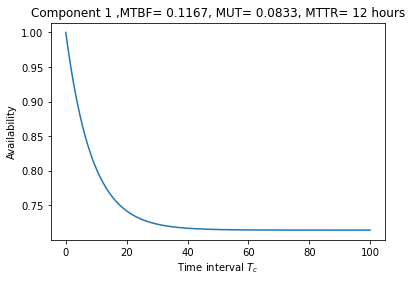

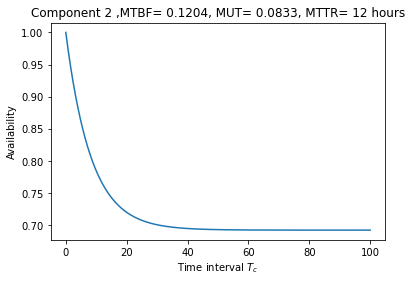

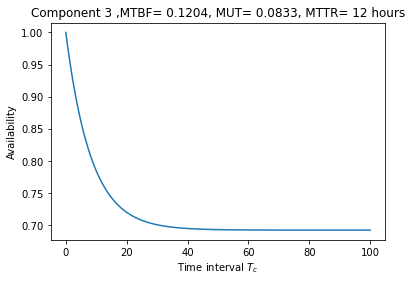

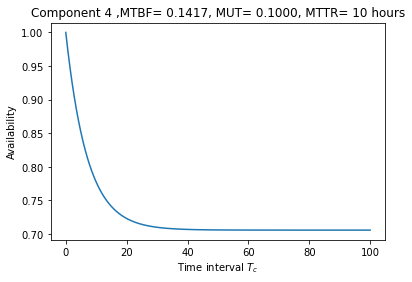

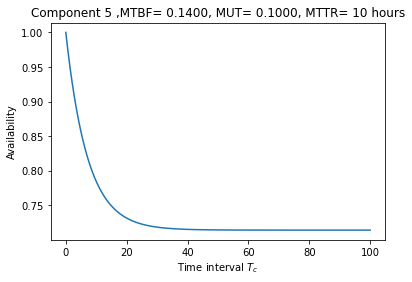

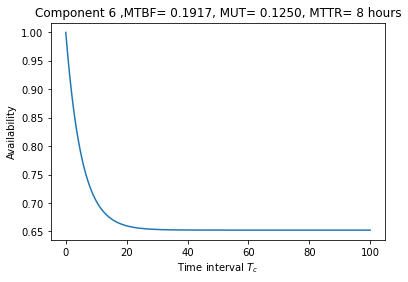

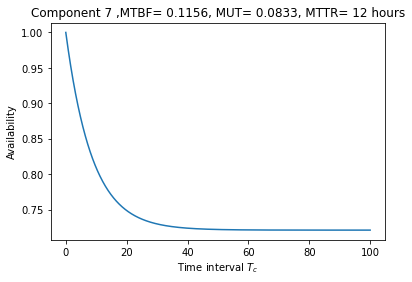

In [105]:
A = np.ndarray((C.shape[0],N))
# mean_times array has per column: MTBF, MUT, MTTR
mean_times = np.ndarray((C.shape[0],3))

for i in range(0, 7):
    t = np.linspace(0, T_c, N)
    mean_times[i][0], mean_times[i][1], mean_times[i][2], A[i, :] = computeAvailabilityWithRecovery(C[i], i, T_c)
    plt.title("Component %d ,MTBF= %1.4f, MUT= %1.4f, MTTR= %d hours" %(i+1, mean_times[i][0] , mean_times[i][1], mean_times[i][2]))
    plt.ylabel("Availability")
    plt.xlabel("Time interval $T_c$")
    #plt.legend(handles=[two],loc='best', fontsize='small', fancybox=True)
    plt.plot(t, A[i,:])
    plt.show()
                        


        
# dadsadsa

In [6]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 17px;
</style>